imports

In [1]:
from typing import *
from langgraph.graph import StateGraph, START, END

from IPython.display import Image,display

In [2]:
class AgentState(TypedDict):
    number1: int
    operation: str
    number2: int
    finalNumber: int

In [3]:
def adder_node(state: AgentState) -> AgentState:
    """
    performs addition. that's it.
    """

    state["finalNumber"] = state["number1"] + state["number2"]
    return state

def multiplier_node(state: AgentState) -> AgentState:
    """
    performs multiplication. what else?
    """

    state["finalNumber"] = state["number1"] * state["number2"]
    return state

def decision_node(state: AgentState) -> AgentState:
    """
    for deciding the next phase of the graph
    """

    if state["operation"] == "+":
        return "addition"
    elif state["operation"] == "*":
        return "multiplication"
    else:
        print("must pass + or * as an operator for this graph to function properly!")

In [4]:
graph = StateGraph(AgentState)

graph.add_node("router", lambda state: state) # since the func of the node doesn't change the attribute 'state' it remains to be 'state' (just makes a comparison)

graph.add_edge(START, "router")

graph.add_node("addition", adder_node)
graph.add_node("multiplication", multiplier_node)

graph.add_conditional_edges(
    "router",
    decision_node,

    {
        # edge -> node formatting

        "addition" : "addition",
        "multiplication" : "multiplication"
    }
)

graph.add_edge("addition", END)
graph.add_edge("multiplication", END)

app = graph.compile()

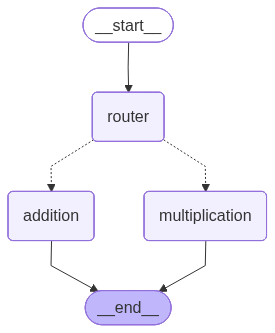

In [5]:
display(Image(app.get_graph().draw_mermaid_png()))

In [6]:
result = app.invoke({"number1": 10,"operation": "*", "number2": 20})
print(result["finalNumber"])

200
